<a href="https://colab.research.google.com/github/YusufAbdurrahmann/Out-going-goods-clustering/blob/main/Outgoing_goods_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# **Data Importing**

In [4]:
df = pd.read_csv("sample_data/barang_keluar_imam.csv", sep=";", engine="python")
df.head()

,kode_barang,nama_barang,jumlah_transaksi,total_penjualan,rata_rata
0,2 TANG BLACK TEA 1 RENCENG (ISI 10),2 TANG BLACK TEA 1 RENCENG (ISI 10),1,1,1.0000
1,2 TANG MELATI 1 RENCENG (ISI 10),2 TANG MELATI 1 RENCENG (ISI 10),1,1,1.0000
2,AQUA 1500 ML 1 DUS,AQUA 1500 ML 1 DUS,10,11,1.1000
3,RIBUT KILOAN,RIBUT KILOAN,77,83,1.0779
4,7916248823,MINYAK TAWON FF,8,9,1.1250


# **Data Understanding**

In [5]:
df.shape

(7403, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7403 entries, 0 to 7402
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   kode_barang       7403 non-null   object 
 1   nama_barang       7373 non-null   object 
 2   jumlah_transaksi  7403 non-null   int64  
 3   total_penjualan   7403 non-null   int64  
 4   rata_rata         7403 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 289.3+ KB


In [7]:
df.describe()

,jumlah_transaksi,total_penjualan,rata_rata
count,7403.000000,7403.000000,7403.000000
mean,37.554640,58.901932,1.442445
std,134.103564,270.367066,4.778477
min,1.000000,1.000000,1.000000
25%,4.000000,5.000000,1.000000
50%,11.000000,12.000000,1.033300
75%,31.000000,38.000000,1.230800
max,6457.000000,10363.000000,180.000000


# **Data Cleaning**

In [9]:
df.isnull().sum()

,0
kode_barang,0
nama_barang,30
jumlah_transaksi,0
total_penjualan,0
rata_rata,0


In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

,0
kode_barang,0
nama_barang,0
jumlah_transaksi,0
total_penjualan,0
rata_rata,0


In [13]:
df.duplicated().sum()

np.int64(0)

# **Explanatory Data Analysis (EDA)**

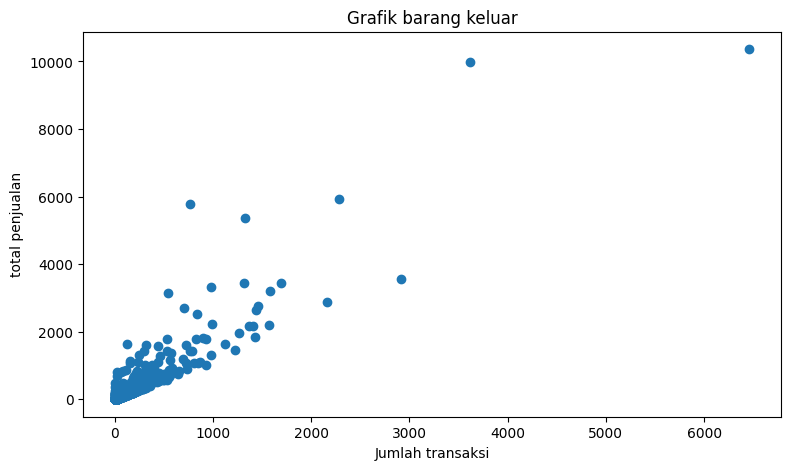

In [19]:
plt.figure(figsize = (9,5))
plt.scatter(df["jumlah_transaksi"],df["total_penjualan"])
plt.title("Grafik barang keluar")
plt.xlabel("Jumlah transaksi")
plt.ylabel("total penjualan")
plt.show()

# **Data Splitting**

In [21]:
x_train = df[["jumlah_transaksi","total_penjualan"]].values

# **Feature Scalling**

In [22]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)

In [23]:
x_train

array([[0.        , 0.        ],
       [0.        , 0.        ],
       [0.00139405, 0.00096506],
       ...,
       [0.00030979, 0.00028952],
       [0.00681537, 0.00868558],
       [0.01285626, 0.00878209]])

# **Modelling**

In [24]:
kmean = KMeans(n_clusters = 3)

y_predict = kmean.fit_predict(x_train)

In [25]:
df["cluster"] = y_predict

# **Centroid EDA**

<ipython-input-32-aee18cadf7fa>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(kmean.cluster_centers_[0,0], kmean.cluster_centers_[0,1], cmap = "rainbow", marker = "*", s = 150, label = "Centroid = 0")
<ipython-input-32-aee18cadf7fa>:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(kmean.cluster_centers_[1,0], kmean.cluster_centers_[1,1], cmap = "rainbow", marker = "*", s = 150, label = "Centroid = 1")


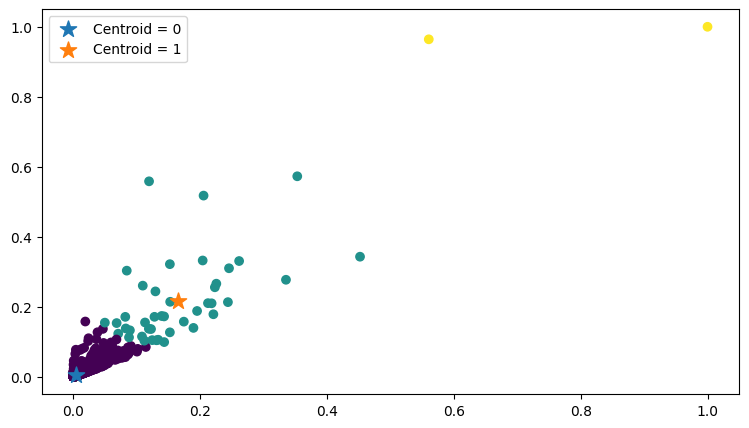

In [32]:
plt.figure(figsize = (9,5))
plt.scatter(x_train[:,0],x_train[:,1], c = kmean.labels_)
plt.scatter(kmean.cluster_centers_[0,0], kmean.cluster_centers_[0,1], cmap = "rainbow", marker = "*", s = 150, label = "Centroid = 0")
plt.scatter(kmean.cluster_centers_[1,0], kmean.cluster_centers_[1,1], cmap = "rainbow", marker = "*", s = 150, label = "Centroid = 1")
plt.legend()

# **Sum Of Squared Error (SSE)**

In [36]:
inertia = []
k_range = range(1,10)

for k in k_range:
  kmean = KMeans(n_clusters = k).fit(x_train)
  inertia.append(kmean.inertia_)

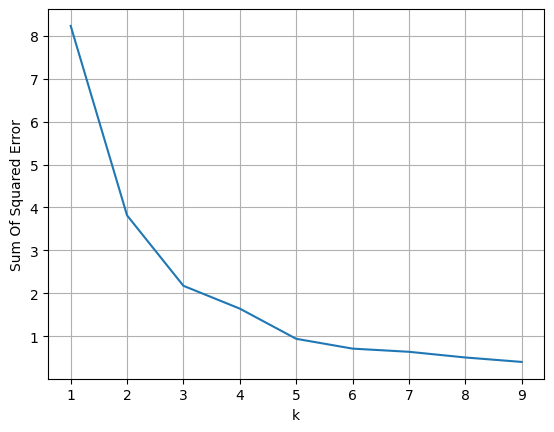

In [44]:
plt.ylabel("Sum Of Squared Error")
plt.xlabel("k")
plt.plot(k_range,inertia)
plt.grid()

In [51]:
df["cluster"] = df["cluster"].replace([0,1,2],["Sedikit", "Sedang", "Banyak"])

In [56]:
df[df["cluster"] == "Sedang"]

,kode_barang,nama_barang,jumlah_transaksi,total_penjualan,rata_rata,cluster
31,89686010046,INDOMIE AYAM SPESIAL,457,1277,2.7943,Sedang
32,89686010343,INDOMIE SOTO MIE,534,1432,2.6816,Sedang
35,89686010947,INDOMIE GORENG,836,2529,3.0251,Sedang
1078,8991002105485,KAPAL API MIX RENCENG,1426,1852,1.2987,Sedang
1395,8992696404441,BEAR BRAND 189ML,699,1193,1.7067,Sedang
1477,8992717781025,SUN KARA 65ML,730,1609,2.2041,Sedang
1845,8992753031900,FF SKM PUTIH RENCENG,1574,2211,1.4047,Sedang
1854,8992753102303,FF SKM COKLAT RENCENG,983,1317,1.3398,Sedang
1938,8992770033178,MASAKO AYAM RENCENG,1223,1448,1.1840,Sedang
2179,8992780010091,2TANG SUPER 1 PACK,769,1422,1.8492,Sedang
